# Graficos

Crear graficos es simple. Si recordamos como lo haciamos en la escuela, aqui es igual. Tenemos dos ejes:
- Eje x
- Eje y

Y le pasaremos a la funcion que realiza el grafico la lista de valores que queremos que dibuje en dichos ejes.

## La libreria seaborn

Esta libreria nos permitira crear graficos de forma simple. Comencemos importando dicha libreria:

In [1]:
import seaborn as sns

Ahora carguemos una tabla de ejemplo que viene incluida en esta libreria y que contiene propinas que han dejado en un restaurante:

In [4]:
tips = sns.load_dataset("tips")
print(type(tips),tips.shape)
tips.head()

<class 'pandas.core.frame.DataFrame'> (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Vemos que la tabla es un DataFrame de pandas con 244 filas y 7 columnas.
Las columnas son las siguientes:
- total_bill: el total de la cuenta
- tip: la propina
- sex: el sexo del mesero
- smoker: si es el area de fumadores o no
- day: dia de la semana
- time: si es almuerzo o cena
- size: cantidad de personas en la mesa

Utilicemos ahora la libreria de graficos para analizar estos datos:

## Analisis de una variable

### Variables categoricas

<AxesSubplot:xlabel='sex', ylabel='count'>

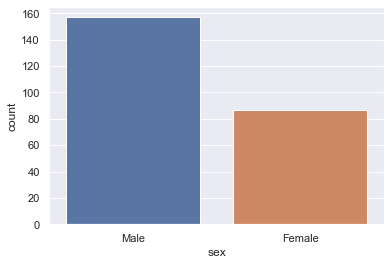

In [4]:
sns.countplot(data=tips, x="sex")

In [ ]:
sns.catplot(data=tips, x="sex")

### Variables numericas, discretas o continuas

<AxesSubplot:xlabel='tip', ylabel='Count'>

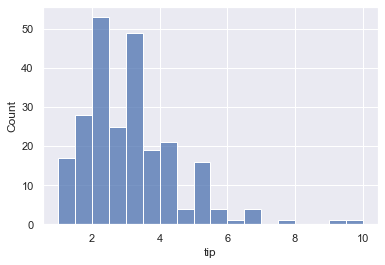

In [5]:
sns.histplot(data=tips, x="tip")

<AxesSubplot:xlabel='tip', ylabel='Density'>

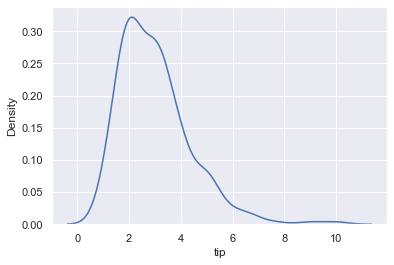

In [6]:
sns.kdeplot(data=tips, x="tip")

## Analisis de dos o mas variables simultaneamente

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

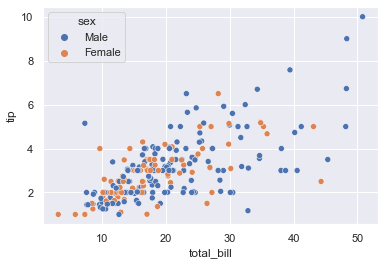

In [7]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")

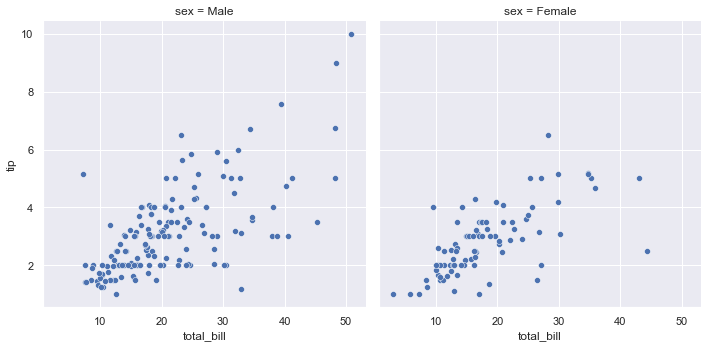

In [10]:
sns.relplot(data=tips, x="total_bill", y="tip", col="sex")

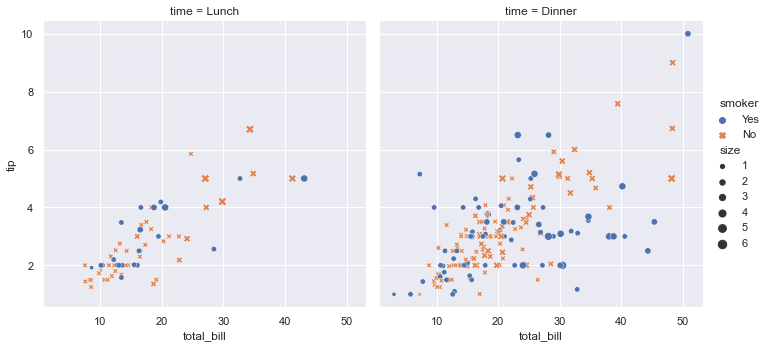

In [17]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

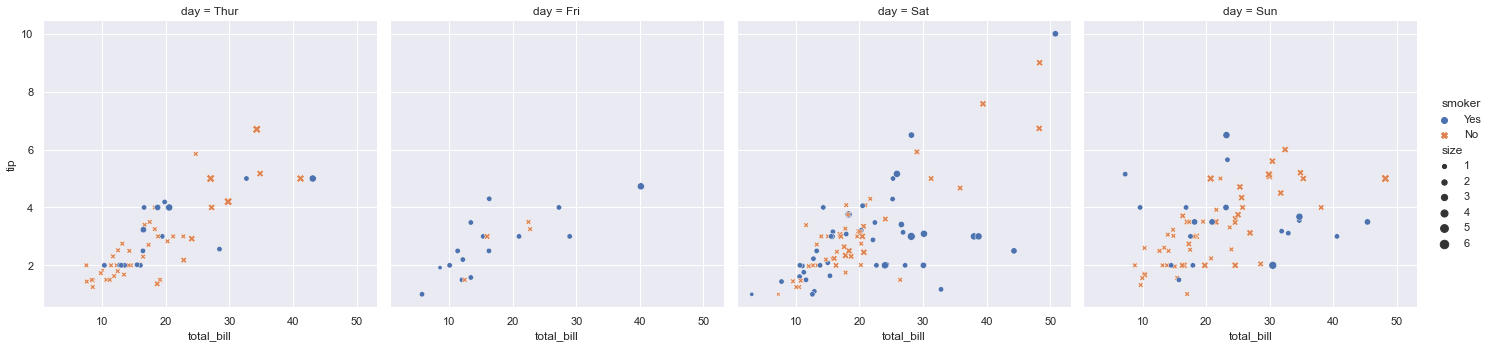

In [21]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="day",
    hue="smoker", style="smoker", size="size",
)

# Ejercicios:

In [18]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Ejercicio 1:

Crear un grafico de barras que muestre la cantidad de sobreviviente vs no sobrevivientes

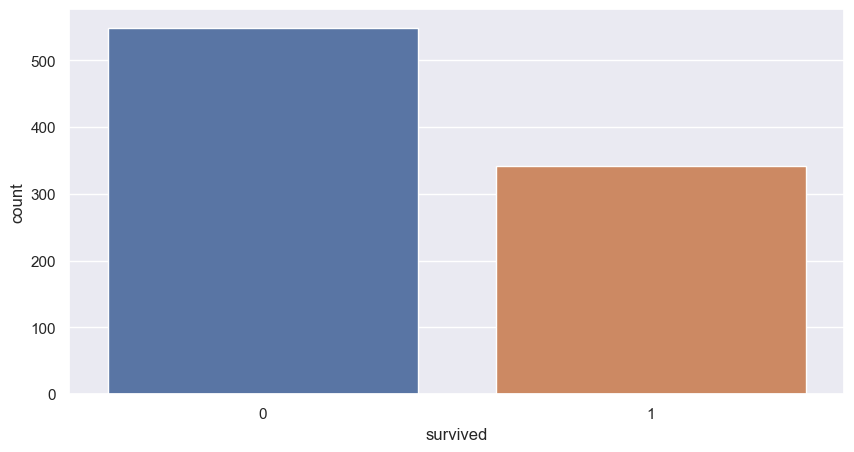

In [5]:
sns.countplot(data=titanic, x="survived");

## Ejercicio 2:

Crear un grafico de barras que muestre la cantidad de pasajeros hombres vs mujeres

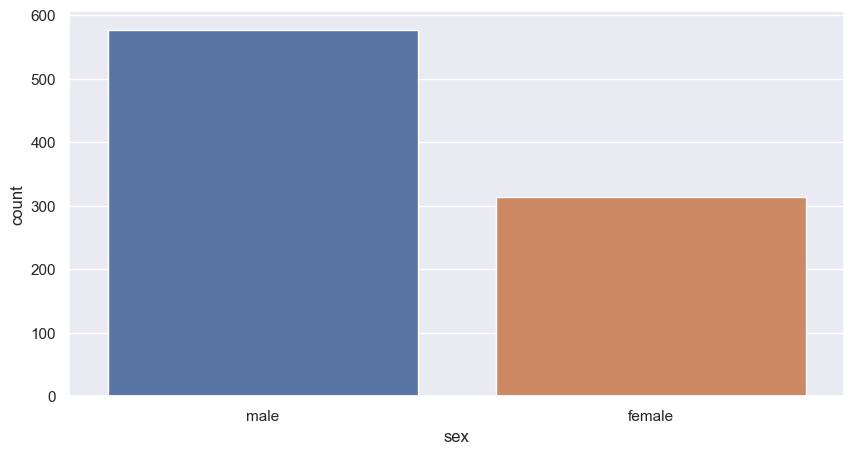

In [6]:
sns.countplot(data=titanic, x="sex");

## Ejercicio 3

Crear un grafico de barras que muestre la cantidad de pasajeros por clase

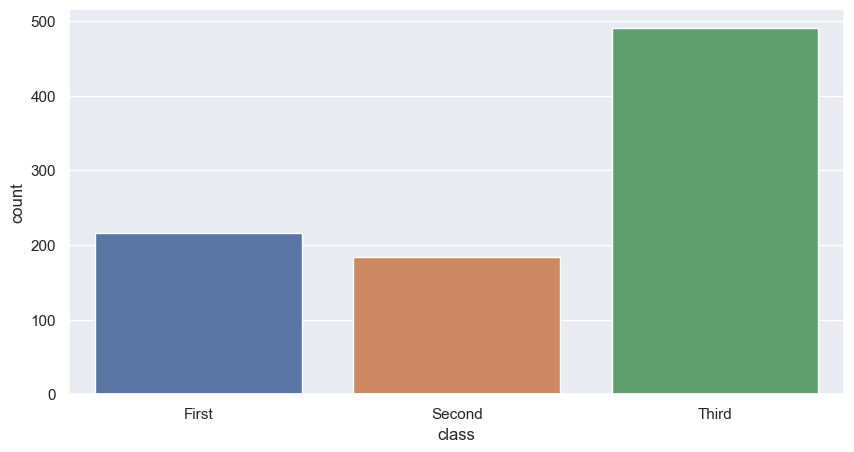

In [7]:
sns.countplot(data=titanic, x="class");

## Ejercicio 4:

Mostrar la distribucion de la variable fare

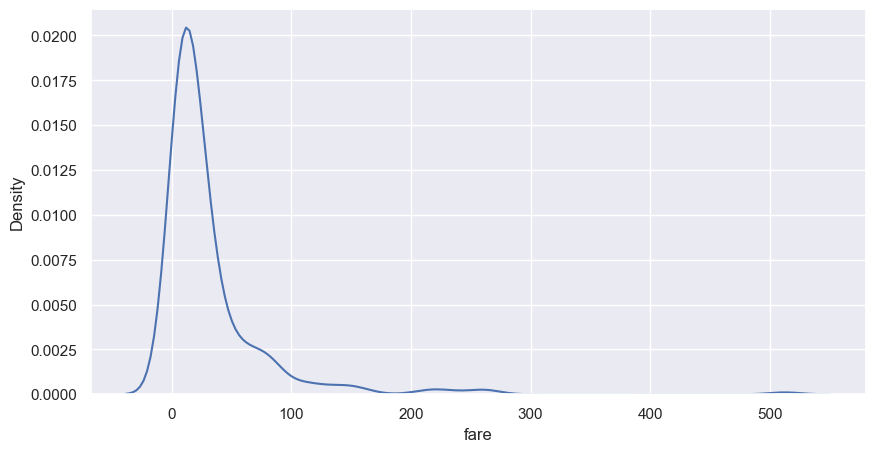

In [8]:
sns.kdeplot(data=titanic, x="fare");

## Ejercicio 5:

Mostrar la distribucion de la variable edad

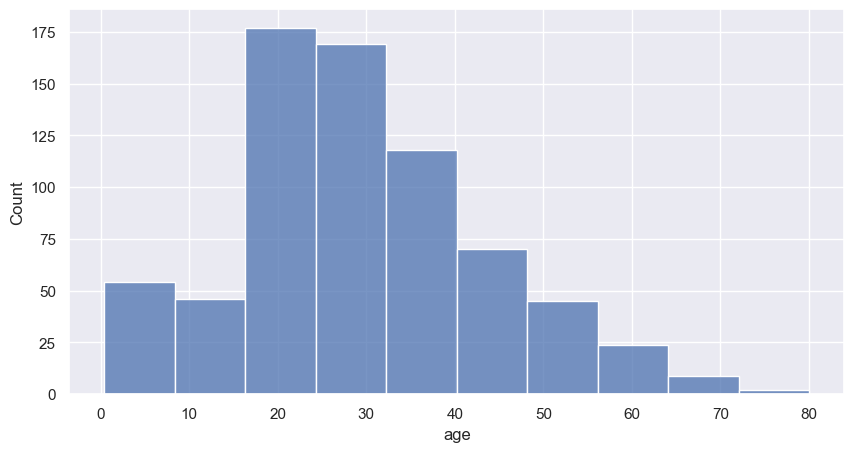

In [9]:
sns.histplot(data=titanic, x="age", bins=10);

## Ejercicio 6:

Mostrar cuantos bebes (menores de 4 años), niños (menores de 16 años) y adultos embarcaron. Ayudarse con pandas creando una nueva columna categorica a partir de la columna edad

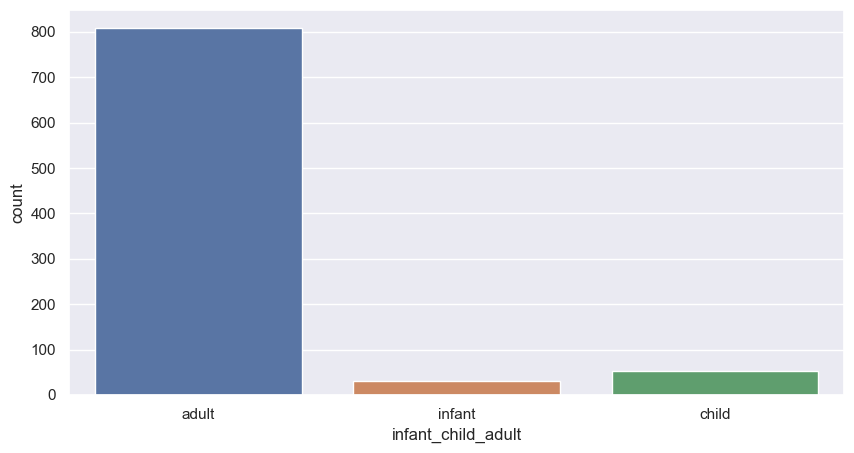

In [10]:
def infant_child_adult(age):
    if age < 4:
        return "infant"
    elif age < 16:
        return "child"
    return "adult"

titanic["infant_child_adult"] = titanic.age.apply(infant_child_adult)
sns.countplot(data=titanic, x="infant_child_adult");

## Ejercicio 7:

Crear un grafico de cajas de la edad diferenciado por clase

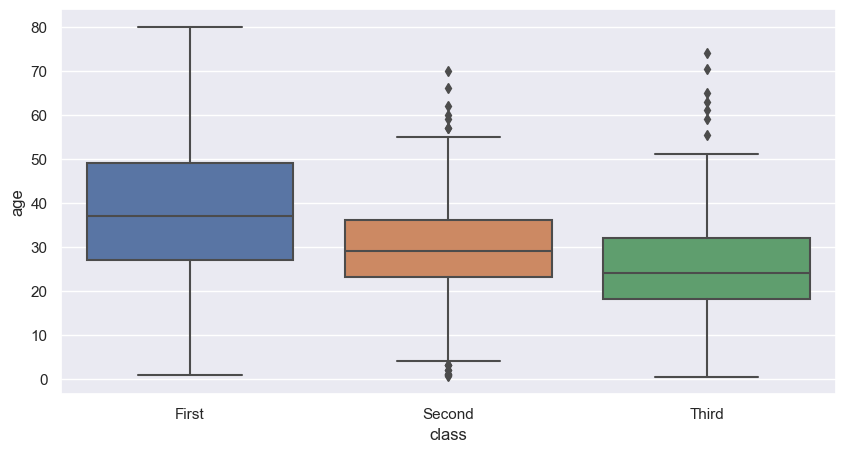

In [11]:
sns.boxplot(data=titanic, x='class', y='age');

## Ejercicio 8:

Mostrar cuantos sobrevivientes hubo por sexo. Usar catplot

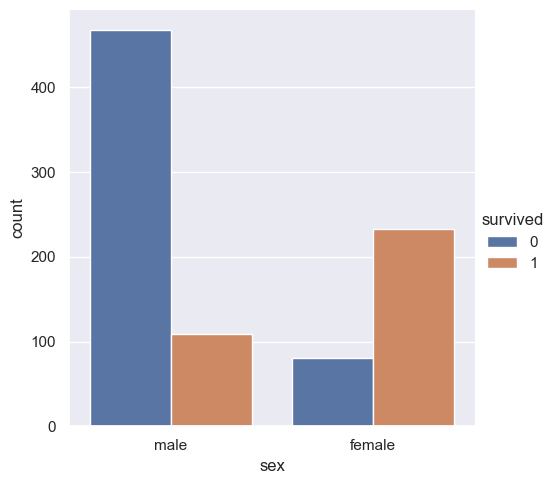

In [12]:
sns.catplot(data=titanic, x="sex", hue="survived", kind="count");

## Ejercicio 9:

Mostrar cuantos sobrevivientes hubo por cada categoria creada por edad (bebe, niño, adulto). Usar catplot

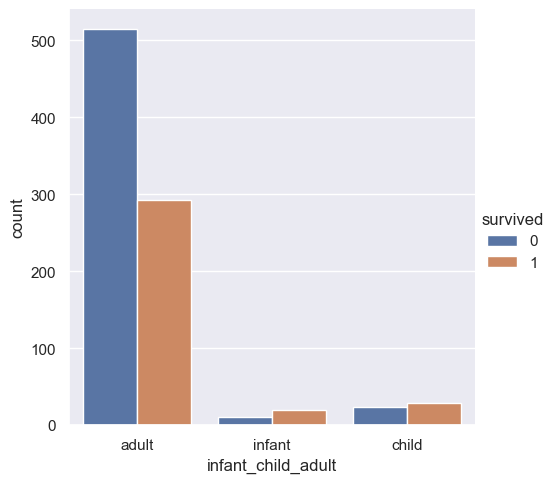

In [13]:
sns.catplot(data=titanic, x="infant_child_adult", hue="survived", kind="count");

## Ejercicio 10:

Mostrar cuantos sobrevivientes hubo diferenciado por la variable alone. Usar catplot

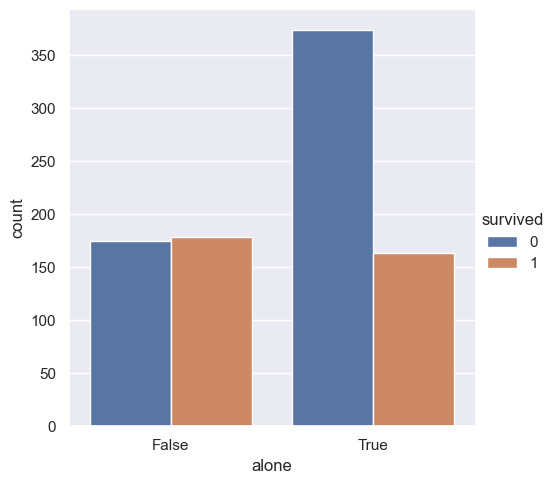

In [14]:
sns.catplot(data=titanic, x="alone", hue="survived", kind="count");

## Ejercicio 11:

Mostrar cuantos sobrevivientes hubo por clase. Usar catplot

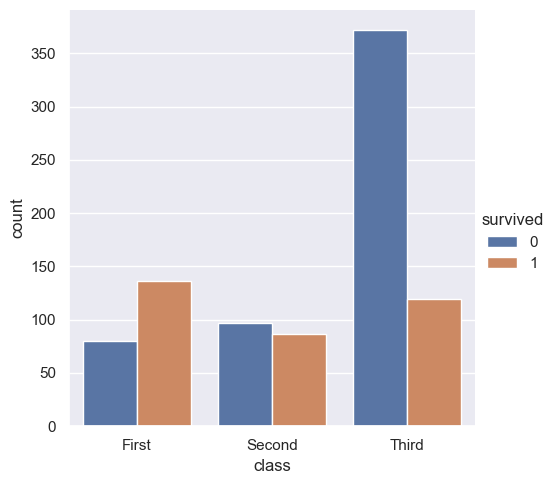

In [15]:
sns.catplot(data=titanic, x="class", hue="survived", kind="count");

## Ejercicio 12:

Crear un pairplot para las variables fare y age con distintos colores para las clases de la variable survived

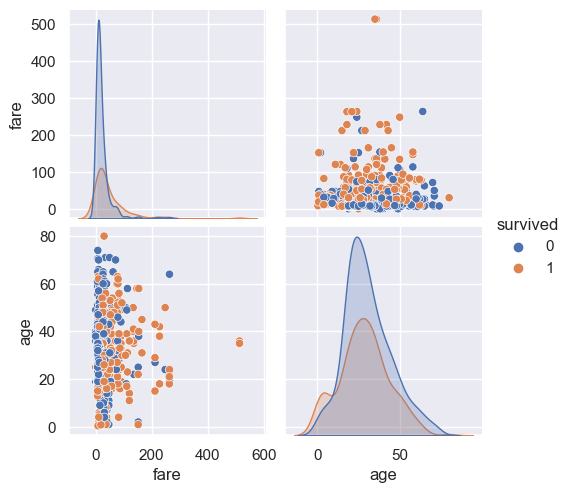

In [16]:
sns.pairplot(data=titanic[['fare','age','survived']],hue='survived')

## Ejercicio 13:

Crear un dos scaterplots, uno para hombres y otro para mujeres que relacione las variables fare y age y diferencie los sobrevivientes por color

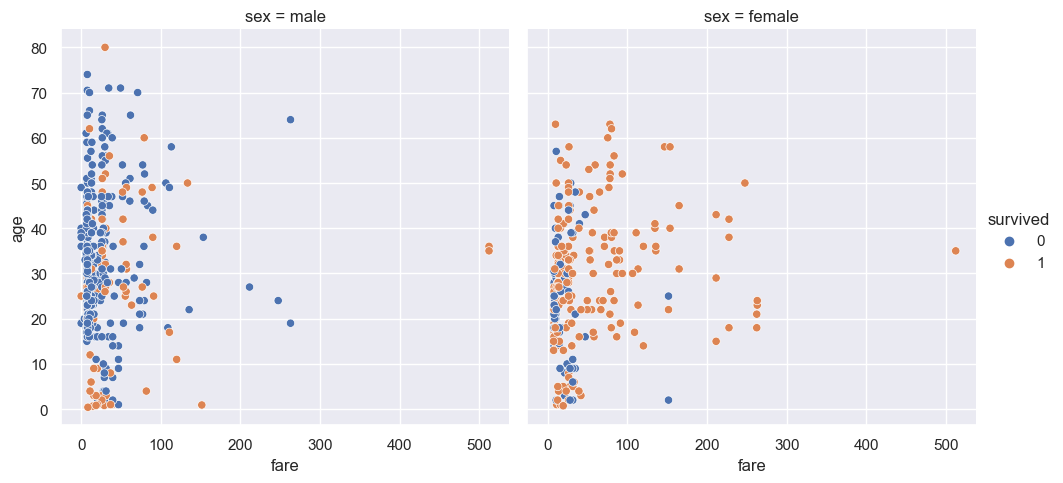

In [17]:
sns.relplot(data=titanic, x="fare", y="age", hue='survived', col="sex"); 

Esta unidad esta basada en la documentacion oficial de seaborn, la cual puedes encontrar aqui: https://seaborn.pydata.org/tutorial/function_overview.html

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/datascience/datascience.html)